# EDA: Exploratory Data Analysis

- tools: `pandas`, `seaborn` & `matplotlib`
- concepts:
    - structure (including joins)
    - granularity
    - scope 
    - temporality
    - faithfulness
- EDA Case Studies: Car Crashes

<div class="alert alert-success">
The examples and data in this notebook are largely adapted from two places: (1) Jake VanderPlas' <a href="https://github.com/jakevdp/PythonDataScienceHandbook" class="alert-link">Python Data Science Handbook</a> and (2) Berkeley's <a href="https://www.textbook.ds100.org/ch/06/viz_intro.html" class="alert-link">Data 100 Textbook</a>. Feel free to check out these resources for more!
</div>

## Exploratory data analysis (EDA)

> an approach to completely and fully understand your dataset.

It requires a state of flexibility and a willingness to look for both:
- artifacts in the data we anticipate exist 
- artifacts that we don't expect / believe are there



## Setup

In [1]:
# Import seaborn and apply its plotting styles
import seaborn as sns
sns.set(style="white", font_scale=2)

# import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
# set plotting size parameter
plt.rcParams['figure.figsize'] = (17, 7)

# make sure pandas & numpy are imported
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

#improve resolution
#comment this line if erroring on your machine/screen
%config InlineBackend.figure_format ='retina'

# EDA

In the [Data 100 Textbook](https://www.textbook.ds100.org/ch/05/eda_intro.html), the authors state that with EDA, "We seek to understand the following properties about our data":

- Structure: the format of our data file.
- Granularity: how fine or coarse each row and column is.
- Scope: how (in)complete our data are.
- Temporality: how the data are situated in time.
- Faithfulness: how well the data captures "reality".

# Structure

What is the format of our data file?

<div class="alert alert-info">
The <b>structure</b> of your data describes the "shape" of the dataset. This refers to the format that the data are stored.
<div>

#### Questions to be able to answer about the structure of your dataset:
1. What format are the data in?
    - tabular (CSV, TSV, Excel, SQL)
    - nested (XML, JSON)   

2. Is each observation in a separate row? 
    - If not, can we get it into that format?
    - If the data are nested, how would we unnest the data

3. What variables (columns) do we have information about?
    - what `type` of information is in each column
    - Do we have all of the variables we need?    

4. Are the data spread across multiple tables? 
    - How do we want to join the data?
    

## Joins

Data are often spread across multiple tables of data, especially when the data are being retrieved from a relational database (i.e. SQL). *Joins* will help you get the data you need into a single DataFrame.

Let's look at an example.

In [2]:
people = pd.DataFrame(
    [["Joey",      "blue",    42,  "M"],
     ["Weiwei",    "blue",    50,  "F"], 
     ["Joey",      "green",    8,  "M"],
     ["Karina",    "green",    7,  "F"],
     ["Nhi",       "blue",     3,  "F"],
     ["Sam",       "pink",   -42,  "M"]], 
    columns = ["Name", "Color", "Number", "Sex"])

In [3]:
email = pd.DataFrame(
    [["Deb",  "deborah_nolan@ucsd.edu"],
     ["Sam",  "samlau95@ucsd.edu"],
     ["John", "doe@nope.com"],
     ["Joey", "jegonzal@cs.ucsd.edu"],
     ["Weiwei", "weiwzhang@ucsd.edu"],
     ["Weiwei", "weiwzhang+123@ucsd.edu"],
     ["Karina", "kgoot@ucsd.edu"]], 
    columns = ["User Name", "Email"])

In [4]:
people

,Name,Color,Number,Sex
0,Joey,blue,42,M
1,Weiwei,blue,50,F
2,Joey,green,8,M
3,Karina,green,7,F
4,Nhi,blue,3,F
5,Sam,pink,-42,M


In [5]:
email

,User Name,Email
0,Deb,deborah_nolan@ucsd.edu
1,Sam,samlau95@ucsd.edu
2,John,doe@nope.com
3,Joey,jegonzal@cs.ucsd.edu
4,Weiwei,weiwzhang@ucsd.edu
5,Weiwei,weiwzhang+123@ucsd.edu
6,Karina,kgoot@ucsd.edu


A join between the two tables on the columns that contain the usernames will allow us to combine these two tables. 

To decide on what *type* of join we'll use, we must then decide how we want to handle people that appear in one table but not the other. (For example, Fernando appears in the `people` table but not the `email` table.)

We have several types of joins for each strategy of matching missing values.

## Inner Join

One of the more common joins is the inner join, where *any row that doesn't have a match is dropped in the final result*:

It only includes rows found in both tables.

In [6]:
people

,Name,Color,Number,Sex
0,Joey,blue,42,M
1,Weiwei,blue,50,F
2,Joey,green,8,M
3,Karina,green,7,F
4,Nhi,blue,3,F
5,Sam,pink,-42,M


In [7]:
email

,User Name,Email
0,Deb,deborah_nolan@ucsd.edu
1,Sam,samlau95@ucsd.edu
2,John,doe@nope.com
3,Joey,jegonzal@cs.ucsd.edu
4,Weiwei,weiwzhang@ucsd.edu
5,Weiwei,weiwzhang+123@ucsd.edu
6,Karina,kgoot@ucsd.edu


In [8]:
# inner join
# Nhi, Deb and John don't appear
people.merge(email, how='inner', 
             left_on='Name', right_on='User Name')

,Name,Color,Number,Sex,User Name,Email
0,Joey,blue,42,M,Joey,jegonzal@cs.ucsd.edu
1,Joey,green,8,M,Joey,jegonzal@cs.ucsd.edu
2,Weiwei,blue,50,F,Weiwei,weiwzhang@ucsd.edu
3,Weiwei,blue,50,F,Weiwei,weiwzhang+123@ucsd.edu
4,Karina,green,7,F,Karina,kgoot@ucsd.edu
5,Sam,pink,-42,M,Sam,samlau95@ucsd.edu


If the field you are joining on had the same name in both dataframe, you could use the `on` parameter instead of `left_on` and `right_on`

## Join Types 
There are four major joins that you'll want to become familiar with:

<center><img src="img/05_joins.png" width="60%" height="60%"></center>


Pandas **`join`** function versus **`merge`** function:
- **`join`** is used when the fields you're joining on are the indices. You don't need to specificy the field in this case; it's implicit.
- **`merge`** is used when fields you join on are columns in the dataframe.
- For the mix case, one field is an index and the other field is a column, use **`merge`** with either **`left_index=True`** or **`right_index=True`**

# Granularity
How fine or coarse is the data stored in each row and column?

<div class="alert alert-info">
The <b>granularity</b> of your data is what each observation in your data represents.
<div>

Often, the observation will be a **single individual** (i.e. information about each person who has called into a call center). 

Other times, it will be data collected about a **single individual at a particular time** (i.e. information about each call received on a given day) - Note that the same individual could be in this dataset multiple times.

Other times, each row will contain a **summary about a number of indidivuals** (i.e. total number of calls received at a call center each day) - Here, each row would contain summarized information about a whole bunch of people.

## Individual Level Granularity

In this example, we see that each observation represents a single individual.

In [9]:
calls = pd.DataFrame(
    [["Joey",      "suspected poisoning",  42,  "M"],
     ["Weiwei",    "ingested substance",   50,  "F"],
     ["Joey",      "chemical in eye",       8,  "M"],
     ["Karina",    "ingested substance",    7,  "F"],
     ["Nhi",       "ingested substance",    3,  "F"],
     ["Sam",       "chemical on skin",     42,  "M"]], 
    columns = ["Name", "Complaint", "Age", "Gender"])

calls

,Name,Complaint,Age,Gender
0,Joey,suspected poisoning,42,M
1,Weiwei,ingested substance,50,F
2,Joey,chemical in eye,8,M
3,Karina,ingested substance,7,F
4,Nhi,ingested substance,3,F
5,Sam,chemical on skin,42,M


## Group-Level Granularity

However often the data we're handed have observations (rows) that summarize information across many individuals.

In [10]:
calls_total = pd.DataFrame(
    [["2019-08-29", 100],
    ["2019-08-30",  212],
    ["2019-08-31",  88],
    ["2019-09-01",  160],
    ["2019-09-02",  122],
    ], 
    columns = ["Date", "Calls"])

calls_total

,Date,Calls
0,2019-08-29,100
1,2019-08-30,212
2,2019-08-31,88
3,2019-09-01,160
4,2019-09-02,122


#### Questions to be able to answer about the granularity of your dataset:
1. What does each record (row) represent?

2. Do all records uniformly represent the same level of granularity
   - are some rows individual-level, while others are summaries of the group? How will this be handled?

3. Were the data summarized or aggregated?
    - How were they grouped & summarized
    - What metrics were used for summarization (means and medians are common)

4. What aggregations/summarizations do we plan to do with these data?
    

# Scope

How (in)complete are our data?

<div class="alert alert-info">
The <b>scope</b> of your data describes how helpful these data are with respect to our data science question.
<div>

At this point, **descriptive statistics** & **exploratory visualizations** become pretty essential.

- Descriptive Statistics - help to summarize typical values and ranges for variables of interest
- Exploratory Visualizations - help us understand the distributions of individual variables and relationships between variables in our dataset

We'll also want to start to determine how frequently, for what variables, and why data are **missing**.

# Temporality
How are these data situated in time?

<div class="alert alert-info">
The <b>temporality</b> refers to how the data are situated in time. Specifically, we're interested in what data and time information are included in the dataset.
<div>


#### Questions to be able to answer about the temporality of your dataset:
1. What do reported times represent?
    - What does each date and time in the dataset mean? Time event occurred? Time reported?
    - Note that **timezones** & **Daylight Saving Time** are always important to consider    

2. How are the dates/times represented? What format are they in?
   - YYYY-MM-DD? Year? Time? Date & Time?

3. How are null timestamps represented? 
    - was a "random" date picked?
        - `Jan 1st 1990` <- Excel's default date
        - `Jan 1st, 1904` <- Excel's default date *on Mac*
        - `12:00am Jan 1st, 1970`<- [Unix Epoch for Timestamps](https://www.wikiwand.com/en/Unix_time#/Encoding_time_as_a_number)
    - `-999`, `NaN`, `NA`

4. What aggregations/summarizations do we plan to do with these data?

# Faithfulness
How well do these data reflect reality?


<div class="alert alert-info">
The <b>faithfulness</b> of your data is a determination of how trustworthy the data are.
<div>

#### Questions to be able to answer about the faithfulness of your dataset:
1. Are the values reasonable / what we expect? 
    - Unreasonable values examples: dates in the future, locations that don't exist, negative counts, wild outliers

2. Are there inconsistencies across tables?
    - Identifiers that don't match?
    - Date of Births that differ between two tables?
    - Any inconsistencies between values stored in more than one table?

3. Are there data entered by hand? These often contain inconsistencies.


4. Any obvious signs of falsification?
    - examples: repeated names, fake looking email addresses, repeated uncommon names or fields

# EDA Case Study: Car Crashes

Typically you won't be handed a dataset without any information about where the data came from or what question you want to ask. But, for the sake of this exercise, let's look at a dataset where we really don't have any information beyond what's in the dataset itself and see what we can figure out through EDA.

## The Data

We'll start with a dataset available by default from the `seaborn` package.

In [11]:
## load dataset in
crashes = sns.load_dataset('car_crashes')

crashes.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


## Structure

<div class="alert alert-info">
The <b>structure</b> of your data describes the "shape" of the dataset. This refers to the format that the data are stored.
<div>

In [12]:
crashes.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


At a glance and without any additional information, we can tell this is **tabular data** with *observations in rows* and *variables in columns*.

### Clicker Question #1

Should we change the way these data are stored and why?

- A) Yes, nested XML is easier to work with
- B) Yes, observations should be in columns 
- C) Yes, nested JSON is easier to work with
- D) No, observations in rows is best
- E) ¯\\\_(ツ)\_/¯

Often the first thing you'll want to know is how big the datset is.

In [13]:
## determine shape of dataset
crashes.shape

(51, 8)

### What type of variable is in each column?

In [14]:
crashes.dtypes 

total             float64
speeding          float64
alcohol           float64
not_distracted    float64
no_previous       float64
ins_premium       float64
ins_losses        float64
abbrev             object
dtype: object

Ok, mostly continuous variables, except for `abbrev` which contains some type of string data.

## Granularity

<div class="alert alert-info">
The <b>granularity</b> of your data is what each observation in your data represents.
<div>

In [15]:
# take a look at the data
crashes.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


By focusing more closely on the `abbrev` category, we get a sense for what each observation represents - each row includes information about car crashes *at the state level*.

### Clicker Question #2

What's the granularity of this dataset? 

- A) Individual-Level
- B) Group-level
- C) Individiual-level over time
- D) Group-level over time

But wait...let's return to the number of observations there are in the dataset.


In [16]:
## determine shape of dataset
crashes.shape

(51, 8)

There are 50 US states...why are there *51* observations? 

## Scope

<div class="alert alert-info">
The <b>scope</b> of your data describes how helpful these data are with respect to our data science question.
<div>

In [17]:
crashes

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA
5,13.6,5.032,3.808,10.744,12.920,835.50,139.91,CO
6,10.8,4.968,3.888,9.396,8.856,1068.73,167.02,CT
7,16.2,6.156,4.860,14.094,16.038,1137.87,151.48,DE
8,5.9,2.006,1.593,5.900,5.900,1273.89,136.05,DC
9,17.9,3.759,5.191,16.468,16.826,1160.13,144.18,FL


Ah! Washington, DC is included in there.

We now have an understanding that we're working with a dataset summarized at the state/territory level. 

## Temporality?

<div class="alert alert-info">
The <b>temporality</b> refers to how the data are situated in time. Specifically, we're interested in what data and time information are included in the dataset.
<div>


This dataset includes no information about when these data were collected, what year/time period they represent. This would be important information if you truly wanted to use them in an analysis.

## Faithfulness?

<div class="alert alert-info">
The <b>faithfulness</b> of your data is a determination of how trustworthy the data are.
<div>

Now, because we have very little information about where these data came from and not much is included in the documenation, right off the bat we should be wary. Nevertheless, we'll take a look to see how believable the values are within the dataset.

## Missing values?

In [18]:
null_rows = crashes.isnull().any(axis=1)
print(crashes[null_rows])

Empty DataFrame
Columns: [total, speeding, alcohol, not_distracted, no_previous, ins_premium, ins_losses, abbrev]
Index: []


Looks like there aren't any missing data in this dataset, which is a good start.

## Expected values? Wild outliers?

We'll look at each of the variables in the dataset to see if any thing looks *off*.

In [19]:
crashes.describe()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,15.790196,4.998196,4.886784,13.573176,14.004882,886.957647,134.493137
std,4.122002,2.017747,1.729133,4.508977,3.764672,178.296285,24.835922
min,5.900000,1.792000,1.593000,1.760000,5.900000,641.960000,82.750000
25%,12.750000,3.766500,3.894000,10.478000,11.348000,768.430000,114.645000
50%,15.600000,4.608000,4.554000,13.857000,13.775000,858.970000,136.050000
75%,18.500000,6.439000,5.604000,16.140000,16.755000,1007.945000,151.870000
max,23.900000,9.450000,10.038000,23.661000,21.280000,1301.520000,194.780000


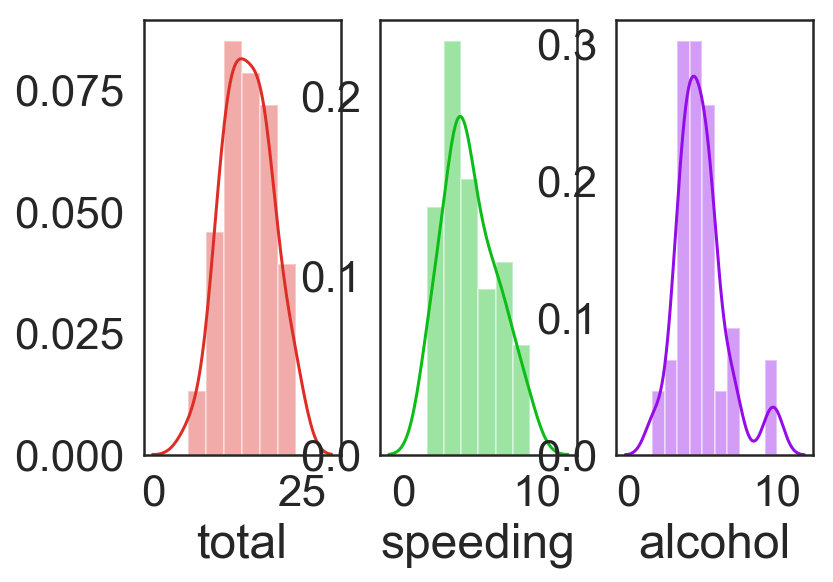

In [20]:
plt.subplot(1, 3, 1)
sns.distplot(crashes['total'], color='#DE2D26')
plt.subplot(1, 3, 2)
sns.distplot(crashes['speeding'], color='#0CBD18')
plt.subplot(1, 3, 3)
sns.distplot(crashes['alcohol'], color='#940CE8');

### Clicker Question #3

After seeing the distributions in these plots which variable would you want to investigate furter?? 

- A) `total`
- B) `speeding`
- C) `alcohol`
- D) None of these

In [21]:
crashes[crashes['alcohol'] > 8]

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
26,21.4,8.346,9.416,17.976,18.190,816.21,85.15,MT
34,23.9,5.497,10.038,23.661,20.554,688.75,109.72,ND
40,23.9,9.082,9.799,22.944,19.359,858.97,116.29,SC


## Distraction & No Previous

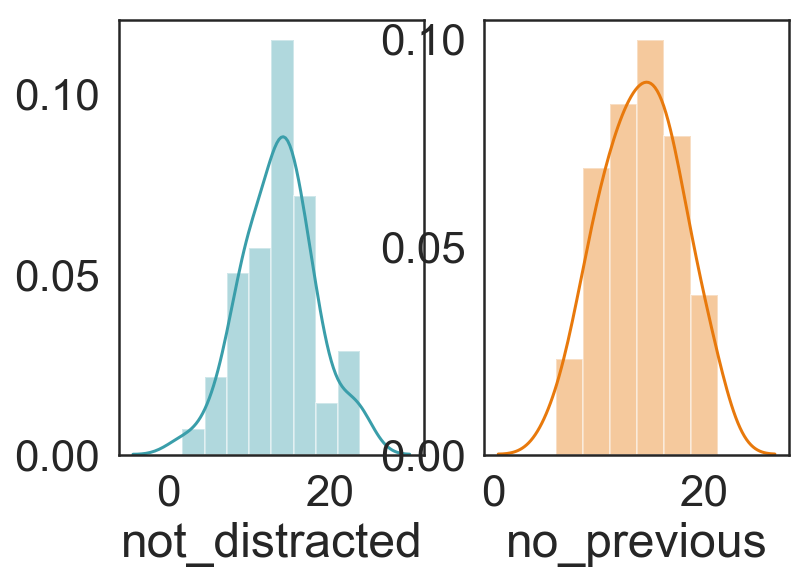

In [22]:
plt.subplot(1, 2, 1)
sns.distplot(crashes['not_distracted'], color='#3A9EAA')
plt.subplot(1, 2, 2)
sns.distplot(crashes['no_previous'], color='#E8790C');

### Relationship between these variables?

We can use scatterplots to start to get an understanding for how these values are related to one another.

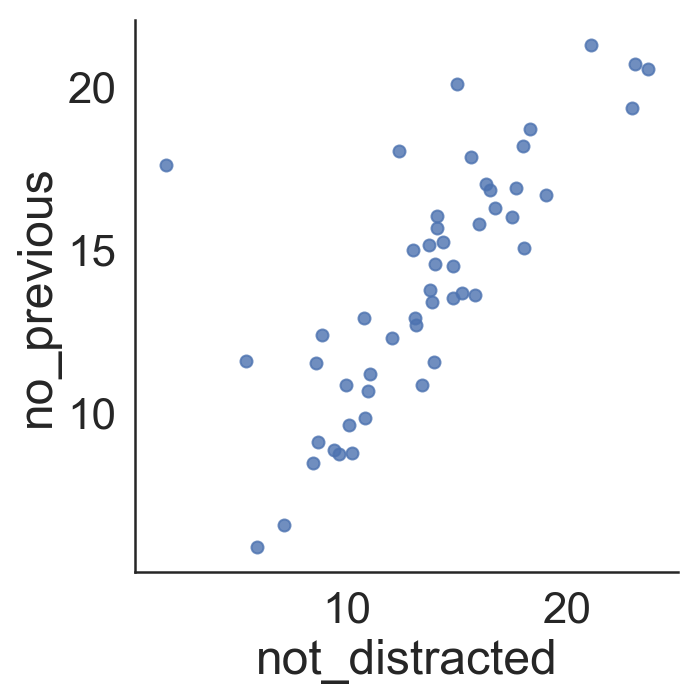

In [23]:
# scatterplot
sns.lmplot(x='not_distracted', y='no_previous', 
           data=crashes, fit_reg=False);

### Clicker Question #4

What best describes the relationship between these two variables? 

- A) Positively Correlated
- B) Negatively correlated
- C) Not correlated
- D) ¯\\\_(ツ)\_/¯

So we see a relationship...but what's going on with that point with a low `not_distracted` score and a high `no_previous` score?

In [24]:
## figure out who the outlier is
## ensure that each condition is in parentheses
crashes[(crashes['not_distracted'] < 5) & (crashes['no_previous'] > 16)]

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
24,17.6,2.64,5.456,1.76,17.6,896.07,155.77,MS


Okay, so Mississippi is behaving oddly with these two variables. Good to know. 

Probably something we should go look up and try to figure out why.

## Insurance Premiums

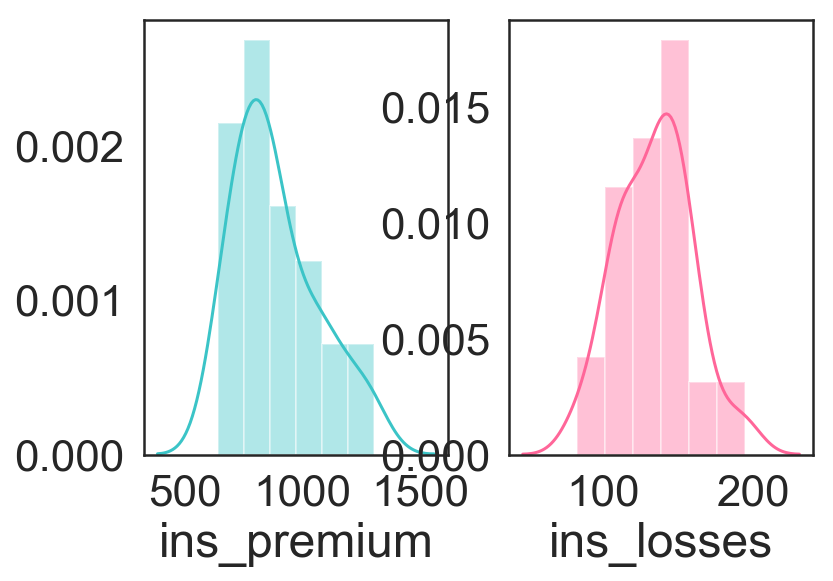

In [25]:
plt.subplot(1, 2, 1)  
sns.distplot(crashes['ins_premium'], color='#3BC4C7')
plt.subplot(1, 2, 2)
sns.distplot(crashes['ins_losses'], color='#FF6699');

No wild outlier values here, but some interesting shapes to the data, with a few states having both higher `ins_losses` and a few having higher `ins_premium`. We can use a scatterplot to see if the same states/territories are found at the high end for each variable.

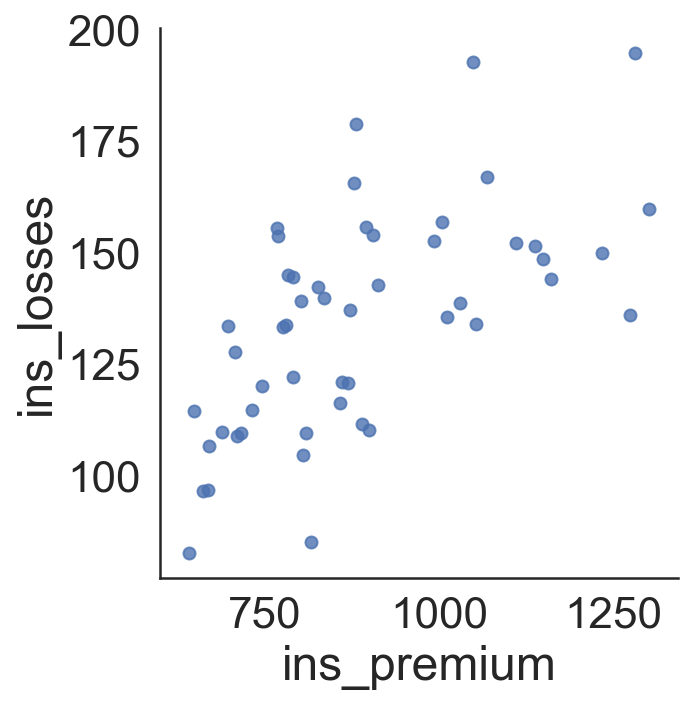

In [26]:
# scatterplot
sns.lmplot(x='ins_premium', y='ins_losses', 
           data=crashes, fit_reg=False);

As in the last scatterplot we looked at, there appears to be a relationship between these variables; however, the correlation is lower than what we saw previously, suggesting a weaker relationship between the two variables. But, it does appear that the higher the premium the higher the losses.

## Scatterplot Matrix

We've looked at the histograms individually and scatterplots for the relationship, so we wanted to note that it is possible to combine the two in a single matrix plot.

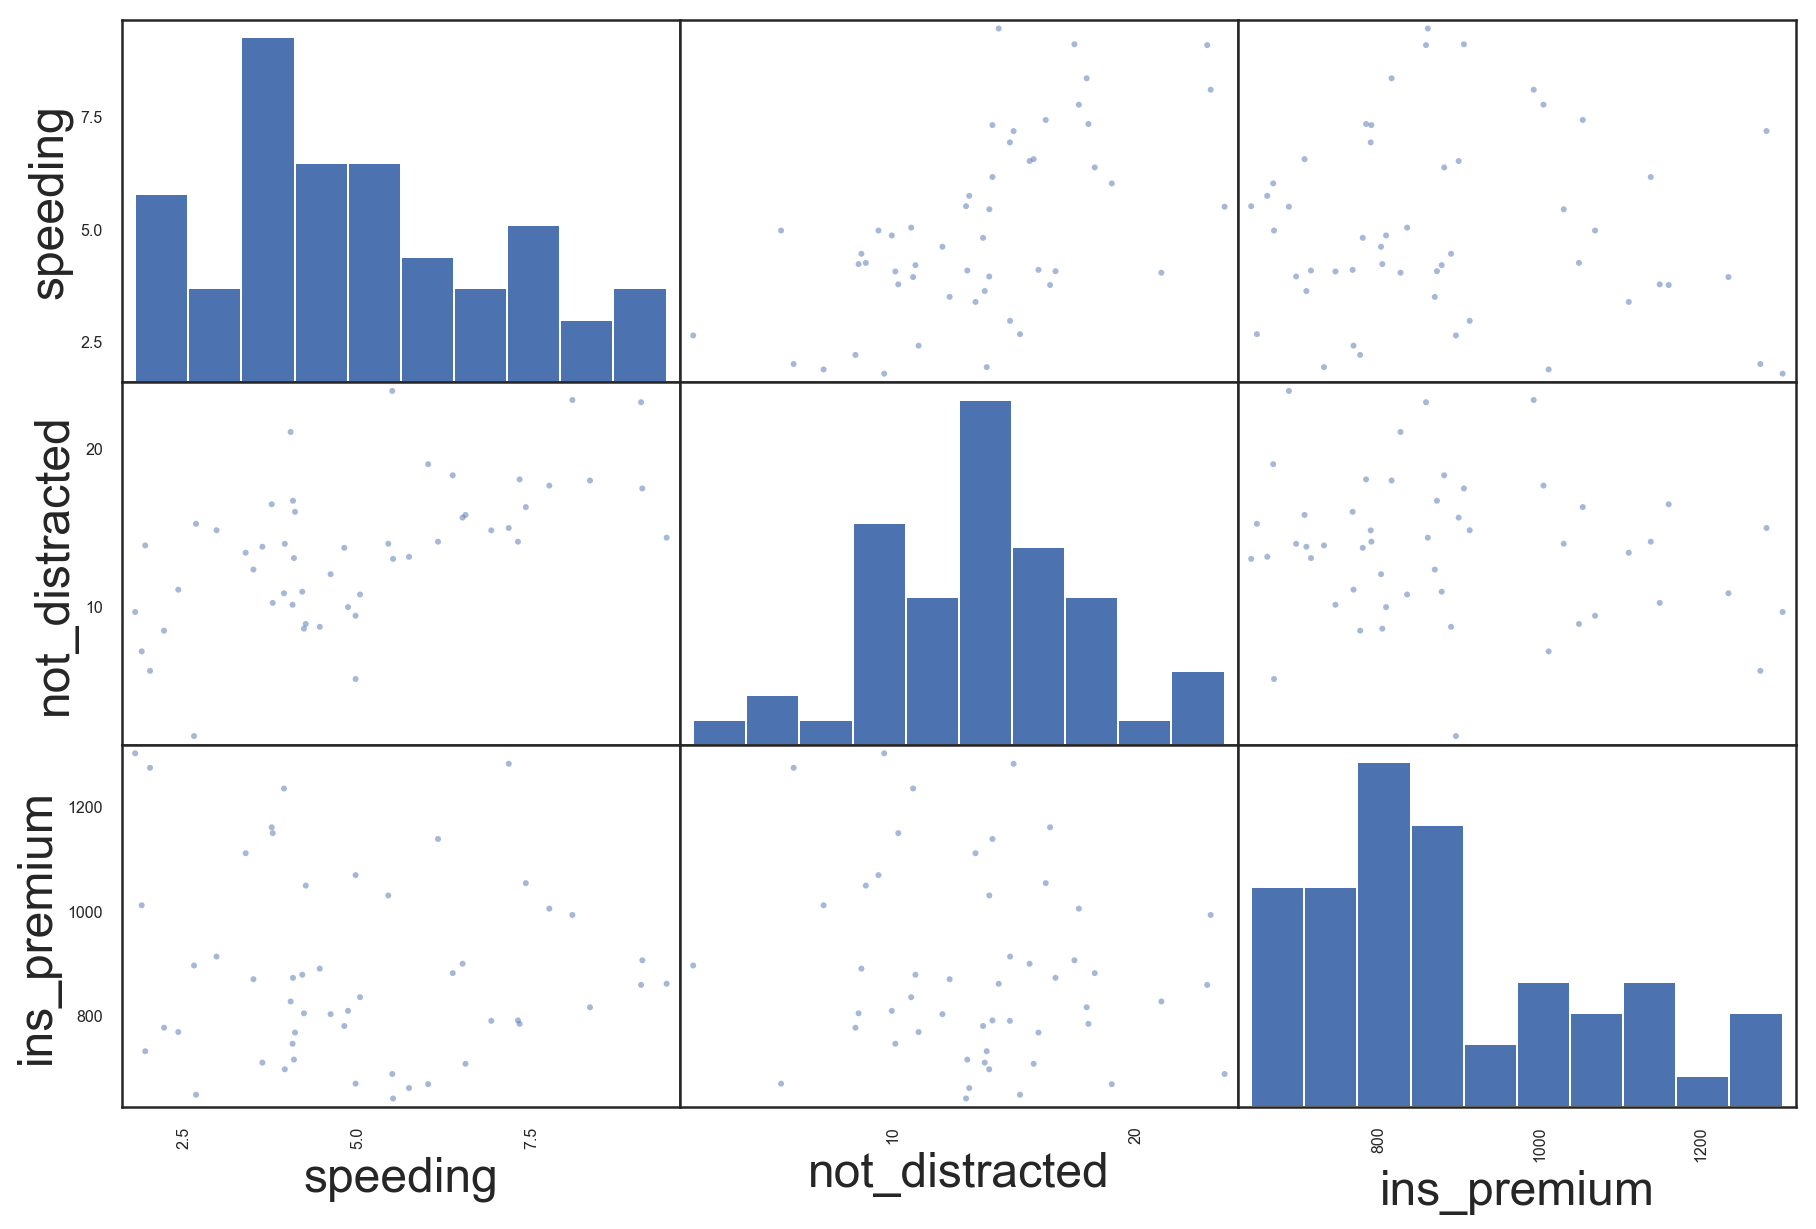

In [27]:
# generate scatter matrix
_ = pd.plotting.scatter_matrix(crashes[['speeding','not_distracted','ins_premium']], figsize=(15, 10))